In [2]:
import fanc
import os
import fanc.plotting as fancplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_color_codes("pastel") # 颜色设定
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [13]:
def LoadfancPlot(filename, ylabel, vmin=0.0001, vmax=0.05, norm="log",  max_dist="None"):
    # norm: "log"  "lin"
    hic = fanc.load(filename)
    if max_dist != "None":
        hp = fancplot.TriangularMatrixPlot(hic, ylabel=ylabel, 
                                           norm=norm,  vmin=vmin, vmax=vmax,
                                           max_dist=max_dist, colormap="bwr")
    else:
        hp = fancplot.TriangularMatrixPlot(hic, ylabel=ylabel,
                                           norm="log", vmin=vmin, vmax=vmax,
                                           blend_zero = True, illegal_color="b",
                                           colormap="bwr")
    # auto vmin, vmax
    if vmin == "auto":
        hp = fancplot.TriangularMatrixPlot(hic, ylabel=ylabel,
                                           norm="log", blend_zero = True, illegal_color="b",
                                           colormap="bwr", matrix_norm=False)
    return(hp)


def LoadfacTrackBarPlot(filename, color, label, ylabel=None, ylim=None, aspect=None, bin_size=None):

    track = fanc.load(filename)
    hp = fancplot.BarPlot(track, colors= [color], labels=[label],
                          ylabel=ylabel, ylim = ylim, 
                          style='step', min_bar_width=0.01, 
                          aspect=aspect, bin_size=bin_size, n_yticks=2)
    return(hp)


def LoadfacTrackLinePlot(filename, color, label, fill=True, ylabel=None, ylim=None, aspect=None, bin_size=None):

    track = fanc.load(filename)
    hp = fancplot.LinePlot(track, fill=fill, style='mid', 
                       colors= [color], labels=[label], 
                       ylabel=ylabel,  ylim = ylim, 
                       draw_ticks=True, aspect=aspect, 
                       bin_size=bin_size, n_yticks=2)
    return(hp)


def LoadfacTrackLinePlot2(filename, color, label, fill=True, ylabel=None, ylim=None, aspect=None, bin_size=None):

    track = fanc.load(filename)
    hp = fancplot.LinePlot(track, fill=fill, style='step', 
                       colors= [color], labels=[label], 
                       ylabel=ylabel,  ylim = ylim, 
                       draw_ticks=True, aspect=aspect, 
                       bin_size=bin_size, n_yticks=2)
    return(hp)

Ylim = {"RNA":(0, 10),
        "P2A":(0, 50),
        "36me3":(0, 20),
        "27me3":(0, 20),
       "27ac":(0, 80),
       "cf":(0, 300),
       "IS":None}


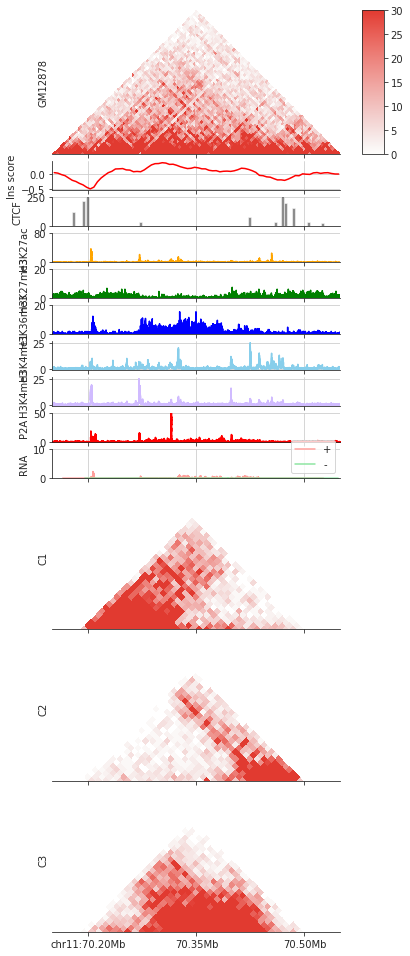

In [12]:
region = ["chr11", 70180000,70500000]
Datadir =  "/data1/ZJY/Pore-C/Analysis/Jupyter/Figures/Cluster/Fig6_7_0410/%s_%d_%dGM12878"%(region[0], region[1], region[2])
os.system("mkdir -p %s"%Datadir)
hplist = []

# NA12878_pore-c 
filename = "/data1/ZJY/Pore-C/Analysis/NA12878/Merge_NA12878/juiceMatrix/NA12878_Rep1_6_output.mcool@5kb"
#filename = "/data1/ZJY/Pore-C/Analysis/K562/K562_merge/juiceMatrix/output.mcool@5kb"
hic = fanc.load(filename)
# Trangular matrix
hp = fancplot.TriangularMatrixPlot(hic, norm="lin", colormap="white_red", matrix_norm=False, vmax=30, ylabel="GM12878")
hplist.append(hp)


# Insulation score trackfile
tfile = "/data1/ZJY/Pore-C/Analysis/NA12878/Merge_NA12878/juiceMatrix/Insulation_10kb_50kb.tsv.50000.bw"
#track_hp = LoadfacTrackBarPlott(file, "red", "ctcf")
track_hp = LoadfacTrackLinePlot(tfile, "red", "Insulation", False, "Ins score", Ylim["IS"], 0.1 )
hplist.append(track_hp)

# CTCF
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_CTCF_IDR_peaks_ENCFF635MMB.bedGraph"
track_hp = LoadfacTrackBarPlot(tfile, "k", "ctcf","CTCF", Ylim["cf"], 0.1 )
#track_hp = LoadfacTrackLinePlot2(tfile, "k", "ctcf", False, "ctcf", Ylim["cf"], 0.1 )
hplist.append(track_hp)


# H3K27ac
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_H3K27ac_fold_change_ENCFF469WVA.bigWig"
#track_hp = LoadfacTrackBarPlott(file, "red", "ctcf")
track_hp = LoadfacTrackLinePlot(tfile, "orange", "H3K27ac", False,  "H3K27ac", Ylim["27ac"], 0.1)
hplist.append(track_hp)

# H3K27me3
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_H3K27me3_fold_change_ENCFF919DOR.bigWig"
#track_hp = LoadfacTrackBarPlott(file, "red", "ctcf")
track_hp = LoadfacTrackLinePlot(tfile, "green", "H3K27me3", False,  "H3K27me3",Ylim["27me3"], 0.1)
hplist.append(track_hp)

# H3K36me3
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_H3K36me3_fold_change_ENCFF312MUY.bigWig"
#track_hp = LoadfacTrackBarPlott(file, "red", "ctcf")
track_hp = LoadfacTrackLinePlot(tfile, "blue", "H3K36me3", False,  "H3K36me3",Ylim["36me3"], 0.1)
hplist.append(track_hp)


# H3K4me1
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_H3K4me1_fold_change_ENCFF564KBE.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "skyblue", "H3K4me1", False,  "H3K4me1",None, 0.1)
hplist.append(track_hp)

# H3K4me3
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_H3K4me3_fold_change_ENCFF927KAJ.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "m", "H3K4me3", False,  "H3K4me3",None, 0.1)
hplist.append(track_hp)


# POLR2A
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_POLR2A_fold_change_ENCFF203NVD.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "red", "POLR2A", True,  "P2A",Ylim["P2A"], 0.1)
hplist.append(track_hp)


# RNA 由于有正负之分，所以分开来显示就好
RNAData={"+": "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_total_RNA_plus_strand_ENCFF808QGQ.bigWig" ,
        "-": "/data1/ZJY/Pore-C/HiGlass/Encode/GM12878_total_RNA_minus_strand_ENCFF936ZZD.bigWig" }
track_hp = fancplot.LinePlot(RNAData, fill=True, style='mid', 
                             colors= ["r", "g"], ylabel="RNA", 
                             ylim = (0, 10) , aspect=0.1,  n_yticks=2 )
hplist.append(track_hp)


# Subcluster
clusters = 3
IDs=["C%d"%i for i in range(1, clusters+1) ]
for idstr in IDs:
    filename = "%s/%s.mcool@10kb"%(Datadir, idstr)
    hic = fanc.load(filename)
    hp = fancplot.TriangularMatrixPlot(hic, colormap="white_red", show_colorbar=False, 
                                       matrix_norm=False, vmax=30, ylabel=idstr, adjust_range=False)
    hplist.append(hp)

    
gfig = fancplot.GenomicFigure(hplist, ticks_last=True)
flank = 0.05 * 10**6
fig, axes = gfig.plot('%s:%.3fmb-%.3fmb'%(region[0], float(region[1]-flank)/10**6, float(region[2]+flank)/10**6) )
Xticks = list( np.linspace(region[1], region[2], 3 ,endpoint=True) )
axes[-1].set_xticks(Xticks)

fig.savefig('%s/heatmap.pdf'%Datadir)


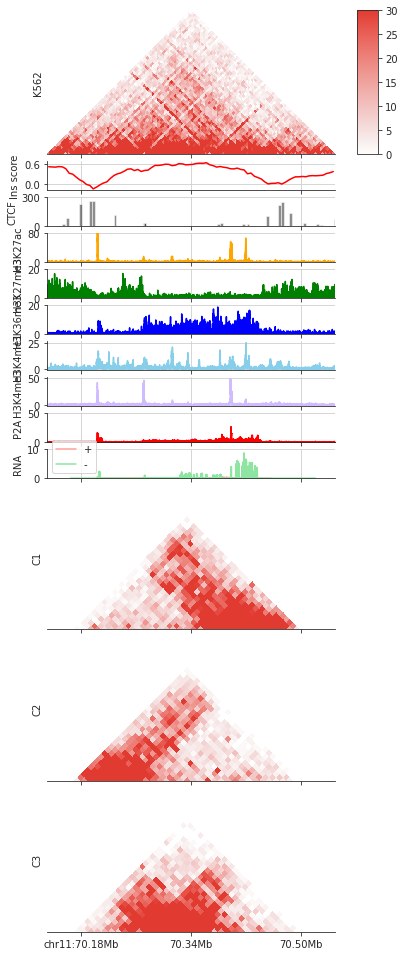

In [15]:
# K562
region = ["chr11", 70180000,70500000]
Datadir =  "/data1/ZJY/Pore-C/Analysis/Jupyter/Figures/Cluster/Fig6_7_0410/%s_%d_%dK562"%(region[0], region[1], region[2])
hplist = []

# K562_pore-c 
filename = "/data1/ZJY/Pore-C/Analysis/K562/K562_merge/juiceMatrix/output.mcool@5kb"
#filename = "/data1/ZJY/Pore-C/Analysis/K562/K562_merge/juiceMatrix/output.mcool@5kb"
hic = fanc.load(filename)
# Trangular matrix
hp = fancplot.TriangularMatrixPlot(hic, norm="lin", colormap="white_red", matrix_norm=False, vmax=30, ylabel="K562")
hplist.append(hp)


# Insulation score trackfile
tfile = "/data1/ZJY/Pore-C/Analysis/K562/K562_merge/juiceMatrix/Insulation_10kb_50kb.tsv.50000.bw"
#track_hp = LoadfacTrackBarPlott(file, "red", "ctcf")
track_hp = LoadfacTrackLinePlot(tfile, "red", "Insulation", False, "Ins score", Ylim["IS"], 0.1 )
hplist.append(track_hp)

# CTCF
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/K562_CTCF_IDR_peaks_ENCFF901CBP.bedGraph"
track_hp = LoadfacTrackBarPlot(tfile, "k", "ctcf","CTCF", Ylim["cf"], 0.1 )
hplist.append(track_hp)


# H3K27ac
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/K562_H3K27ac_fold_change_ENCFF849TDM.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "orange", "H3K27ac", False,  "H3K27ac", Ylim["27ac"], 0.1)
hplist.append(track_hp)

# H3K27me3
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/K562_H3K27me3_fold_change_ENCFF405HIO.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "green", "H3K27me3", False,  "H3K27me3",Ylim["27me3"], 0.1)
hplist.append(track_hp)

# H3K36me3
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/K562_H3K36me3_fold_change_ENCFF163NTH.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "blue", "H3K36me3", False,  "H3K36me3",Ylim["36me3"], 0.1)
hplist.append(track_hp)


# H3K4me1
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/K562_H3K4me1_fold_change_ENCFF834SEY.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "skyblue", "H3K4me1", False,  "H3K4me1",None, 0.1)
hplist.append(track_hp)

# H3K4me3
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/K562_H3K4me3_fold_change_ENCFF660WUG.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "m", "H3K4me3", False,  "H3K4me3",None, 0.1)
hplist.append(track_hp)



# POLR2A
tfile = "/data1/ZJY/Pore-C/HiGlass/Encode/K562_POLR2A_fold_change_ENCFF806LCJ.bigWig"
track_hp = LoadfacTrackLinePlot(tfile, "red", "POLR2A", True,  "P2A",Ylim["P2A"], 0.1)
hplist.append(track_hp)


# RNA 由于有正负之分，所以分开来显示就好
RNAData={"+": "/data1/ZJY/Pore-C/HiGlass/Encode/K562_total_RNA_minus_strand_ENCFF013KWA.bigWig" ,
        "-": "/data1/ZJY/Pore-C/HiGlass/Encode/K562_total_RNA_plus_strand_ENCFF944XYT.bigWig" }
track_hp = fancplot.LinePlot(RNAData, fill=True, style='mid', 
                             colors= ["r", "g"], ylabel="RNA", 
                             ylim = (0, 10) , aspect=0.1,  n_yticks=2 )
hplist.append(track_hp)

# Subcluster
clusters = 3
IDs=["C%d"%i for i in range(1, clusters+1) ]
for idstr in IDs:
    filename = "%s/%s.mcool@10kb"%(Datadir, idstr)
    hic = fanc.load(filename)
    hp = fancplot.TriangularMatrixPlot(hic, colormap="white_red", show_colorbar=False, 
                                       matrix_norm=False, vmax=30, ylabel=idstr, adjust_range=False)
    hplist.append(hp)

gfig = fancplot.GenomicFigure(hplist, ticks_last=True)
flank = 0.05 * 10**6
fig, axes = gfig.plot('%s:%.3fmb-%.3fmb'%(region[0], float(region[1]-flank)/10**6, float(region[2]+flank)/10**6) )
Xticks = list( np.linspace(region[1], region[2], 3 ,endpoint=True) )
axes[-1].set_xticks(Xticks)

fig.savefig('%s/heatmap.pdf'%Datadir)